# Lab session 1

The aim of this session is to give you a (small) amount of experience writing Python - in addition, you should work through (most of) the chapters in McKinney, which gives a concise introduction. 

The second aim is to write a small Python programming for fitting a line to data, using gradient descent, and to gain an intuitive understanding of the behaviour of gradient descent by visualising the results, and experimenting with different parameter values. 

In [5]:
import numpy as np
import math     # these commands allow us to use functions in the numpy and math modules

## Creating vectors and matrices

In [ ]:
d = [1, 2, 7.5, 3, -1, 4]

What type is d? 

In [ ]:
type(d)

Ah! Unlike in matlab this is not a vector - it is a list. 

list is a core Python type which is not implemented as an array. To make an efficient numpy array, we need to use numpy commands. The most basic one is `np.array`

In [6]:
a = np.array([2,3, 7, -23.2])

In [7]:
type(a)

numpy.ndarray

We can also make numpy arrays by generation arrays directly full of random numbers, or zeros

In [8]:
b = np.random.random([3,5]) # uniform random numbers between 0 and 1
b

array([[0.04682008, 0.02223779, 0.06916272, 0.91736966, 0.36124464],
       [0.56778206, 0.34409004, 0.8441917 , 0.92994295, 0.71693018],
       [0.28546509, 0.1968618 , 0.09366161, 0.07868729, 0.87729699]])

Annoyingly, the corresponding function for generating normal random variates has a different syntax ! 
Can anyone find out why? 
Look:

In [9]:
b = np.random.randn(4,2) # normally distributed random numbers with mean 0 and standard deviation 1
b

array([[-1.00859032,  0.56664404],
       [ 2.17772921,  0.39556663],
       [ 2.48692534, -1.98379585],
       [-1.4599046 ,  0.16435026]])

You can get documentation and help on a function by typing a question mark in front of it: 

In [ ]:
?np.random.randn

`np.zeros` has the same syntax as `np.random.random`

In [ ]:
b = np.zeros([3,2])
b

In [ ]:
You should look at the documentation for most of the functions we use in this exercise. 

## Visualising arrays and vectors

In mathematical programming, you calculate large arrays of numbers. The only way of knowing what is going on is to visualise these arrays.

There are two functions I use more frequently than any others: `imshow` and `plot`, both of which are in the `matplotlib.pyplot` module, which must be imported

In [13]:
import matplotlib.pyplot as plt  # it is more convenient to type plt than matplotlib.pyplot every time

# the following 'magic' instruction makes the plots appear in the notebook itself
%matplotlib inline  

### imshow : plotting a matrix as a colormap

In [ ]:
a = np.random.random([2,3])
a

In [ ]:
plt.imshow(a)
plt.colorbar()

imshow( <matrix> )   # this shows the matrix as a colormap. Useful for seeing what is in the matrix
colorbar()           # puts a colour scale to one side of the matrix, so that you can see what the values are. 

In [ ]:
v = np.cumsum( np.array( [1,2,3,17,-6])) # cumsum works as in matlab

In [ ]:
v

In [ ]:
plt.plot( v )

In [ ]:
x = np.random.randn(100,1)
y = np.random.randn(100,1)

plt.plot(x,y,'r.') # red dots

In [ ]:
plt.plot(x,y,'.')
u = np.random.randn(20,1)
v = np.random.randn(20,1)
plt.plot(u,v,'r.')

Note that if several plotting commands are given in the same Jupyter cell, the plots appear on top of each other, just as if in matlab one had typed `hold on`

In [ ]:
math.sqrt( np.mean(a * a) )

In [ ]:
plt.plot([1,2],[3,4])

# Finding a line of best fit by gradient descent

First we define some (synthetic) data to work with, consisting of x values and y values

In [10]:
x_data = np.array( [x for x in range(0,10)])
x_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
y_data = 1.1 + 0.6 * x_data +  np.random.randn(x_data.size)

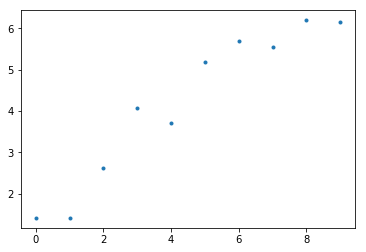

In [14]:
plt.plot(x_data,y_data,'.')

We have data $(x_1, y_1), \ldots, (x_n, y_n)$

Now we want to find the line of best fit through this data.  

We are going to do this using gradient descent. 

First, how do we define a line? 

$\hat{y} = m x + c$

We put the hat over $y$ to show it is a prediction, not the data value. 

There are two parameters to find: $m$ and $c$

Next, what is "best fit"?

Given parameter values $m$ and $c$, our prediction of $y_i$ is

$\hat{y}_i = m x_i + c$

We use mean squared prediction error $J$ as the measure of goodness of fit: 

$J = \frac{1}{n}\sum_{i=1}^n (\hat{y}_i - y_i)^2$

Let us create a function that calculates $J$ from $x$, $y$, $m$, and $c$

In [15]:
def calculate_J(x,y,m,c):
    """
    x, y are ndarrays of the same length
    m and c are floating point numbers giving gradient and intercept of a line
    """
    yhat  = m * x + c
    errs = (yhat - y)**2
    J = np.mean( errs )
    return J

In [16]:
m_values = np.linspace(0,1,200)
c_values = np.linspace(0,2,200)

In [ ]:
`linspace` 

In [17]:
J_grid = np.zeros([m_values.size,c_values.size])

for m_index in range(0,m_values.size):
    for c_index in range(0,c_values.size):
        J_grid[m_index,c_index] = calculate_J(x_data, y_data, m_values[m_index], c_values[c_index] )    

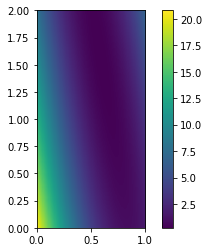

In [18]:
plt.imshow(J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()

The x-axis corresponds to values of m; the y-axis corresponds to values of c. 

The colour shows the value of J for each combination of values of m and c. 

This colour map is a little hard to read. We are interested in the position of the p

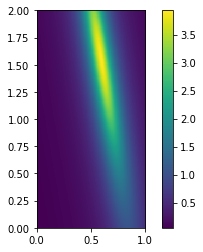

In [19]:
plt.imshow(1. / J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()

In [20]:
def J_gradient(x,y,m,c):
    """
    x, y are ndarrays of the same length
    m and c are floating point numbers giving gradient and intercept of a line
    
    Returns the gradient J with respect to 
    """
    yhat = m*x + c 
    c_grads = 2 * (yhat - y)
    m_grads = 2 * (yhat - y) * x
    # now take the means of these, since J is the mean of the square error
    c_grad = np.mean( c_grads )
    m_grad = np.mean( m_grads )
    return (m_grad, c_grad)

In [21]:
J_gradient(x_data,y_data,0,0)

(-47.55364040419694, -8.411346171577863)

In [22]:
J_gradient(x_data,y_data, 0.6, 1.1)

(-3.4536404041969404, -0.8113461715778628)

Now let us try to optimise by gradient descent

In [64]:
# Original formula
m = 0.0
c = 0.0 

m_path = [m]
c_path = [c]

n_iterations = 200
learning_rate = 0.034

for n in range(1,n_iterations):
    m_grad, c_grad = J_gradient(x_data, y_data, m, c )
    m = m - learning_rate * m_grad
    c = c - learning_rate * c_grad
    m_path.append(m)
    c_path.append(c)
    
# at this point you may want to inspect m_path and c_path

In [ ]:
# Formula modified for m change and c change...(next thing to work on)

m = 0.0
c = 0.0 
x_data[0] = 0.0
y_data[0] =0.0

m_path = [m]
c_path = [c]

n_iterations = 200
learning_rate = 0.034

for n in range(1,n_iterations):
    m_grad, c_grad = J_gradient(x_data, y_data, m, c )
    m_change, c_change = J_gradient(x_data, y_data, m, c )
    m = m - learning_rate * m_grad
    c = c - learning_rate * c_grad
    m_path.append(m)
    c_path.append(c)
    

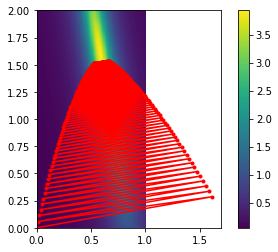

In [65]:
plt.imshow(1. / J_grid.transpose(), origin='lower',extent=[0,1,0,2])
plt.colorbar()
plt.plot(m_path,c_path,'r')
plt.plot(m_path,c_path,'r.')

Tasks for you to do: 
    
1. What happens if the learning rate is high? (Inspect the values on the paths)

A) The proccess doesn't converge

2. What is the highest value of the learning rate for which this process converges?

A) learning_rate = 0.03422

3. Alter the code to record the value of J at each point along the path. For what values of learning rate does J decrease fastest? Can you plot how J decreases with the number of iterations? 

4. Try using gradient descent with momentum. Alter the code so that you record the previous change in m and in c, (call these m_change, and c_change). On the next loop iteration, use m_change = momentum * m_change - learning_rate * m_grad, and similarly for c.  Then change m by m = m + m_delta,  c = c + c_delta. 

5. What is the effect of increasing / reducing the x_data (that is, multiply the x_data by 10? and see what happens to the error surface, and gradient descent convergence.

6. Intuitively, why is J so much more sensitive to m than to c here?  

7. Can you plot the lines corresponding to the estimated values of m and c during optimisation ? 

 